In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, PassiveAggressiveClassifier, RidgeClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier
from tabulate import tabulate
from tqdm import tqdm

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import re
import nltk
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import (
    LogisticRegression,
    RidgeClassifier,
    SGDClassifier,
    PassiveAggressiveClassifier,
    Perceptron,
)
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.neighbors import (
    KNeighborsClassifier,
    RadiusNeighborsClassifier,
    NearestCentroid,
)
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
    VotingClassifier,
)
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import *
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    BaggingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from tabulate import tabulate  # Import the tabulate library
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/content/MusicDataset.csv")

In [3]:
df

,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_name,duration,end_of_fade_in,key,...,mode_confidence,release,song_hotttnesss,start_of_fade_out,tempo,time_signature,time_signature_confidence,title,year,bbhot
0,0.780462,0.574275,ARMQHX71187B9890D3,NaN,"Atlanta, GA",NaN,Mastodon,280.21506,0.238,5,...,0.500,Call of the Mastodon,0.597641,275.528,173.205,5,0.120,Deep Sea Creature,2001,0
1,0.581794,0.401998,ARD7TVE1187B99BFB1,NaN,California - LA,NaN,Casual,218.93179,0.247,1,...,0.636,Fear Itself,0.602120,218.932,92.198,4,0.778,I Didn't Mean To,0,0
2,0.630630,0.417500,ARMJAGH1187FB546F3,35.14968,"Memphis, TN",-90.04892,The Box Tops,148.03546,0.148,6,...,0.430,Dimensions,NaN,137.915,121.274,4,0.384,Soul Deep,1969,1
3,0.487357,0.343428,ARKRRTF1187B9984DA,NaN,NaN,NaN,Sonora Santanera,177.47546,0.282,8,...,0.565,Las Numero 1 De La Sonora Santanera,NaN,172.304,100.070,1,0.000,Amor De Cabaret,0,0
4,0.630382,0.454231,AR7G5I41187FB4CE6C,NaN,"London, England",NaN,Adam Ant,233.40363,0.000,0,...,0.749,Friend Or Foe,NaN,217.124,119.293,4,0.000,Something Girls,1982,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.722571,0.499826,AR4C6V01187FB3BAF4,39.55792,Portugal,-7.84481,Moonspell,386.19383,0.177,7,...,0.540,Sin / Pecado,0.594080,386.194,140.185,4,0.099,The Hanged Man,1998,0
9997,0.511663,0.409779,AR9JLBU1187B9AAEC4,-33.96243,"Port Elizabeth, South Africa",25.62326,Danny Williams,168.01914,0.403,8,...,0.398,Collection,0.334707,163.463,77.072,3,0.597,The Wonderful World Of The Young,1998,1
9998,0.433508,0.289903,ARS1DCR1187B9A4A56,NaN,NaN,NaN,Winston Reedy,193.72363,0.173,1,...,0.565,Reality,NaN,186.015,118.123,4,0.205,Sentimental Man,0,0
9999,0.334457,0.216829,ARAGMIV11F4C843F78,NaN,NaN,NaN,"Myrick ""Freeze"" Guillory",300.82567,0.000,0,...,0.503,Nouveau Zydeco,0.000000,300.826,137.663,4,0.000,Zydeco In D-Minor,0,0


In [4]:
df.isnull().sum()


,0
artist_familiarity,4
artist_hotttnesss,0
artist_id,0
artist_latitude,6259
artist_location,4292
artist_longitude,6259
artist_name,0
duration,0
end_of_fade_in,0
key,0


In [5]:
drop_list = ['artist_location', 'artist_latitude', 'artist_longitude','artist_name', 'release', 'title']
train = df.drop(drop_list, axis=1)

In [6]:
# Filling up the null values:

train["song_hotttnesss"] = train["song_hotttnesss"].fillna(train["song_hotttnesss"].mean())
train["artist_familiarity"] = train["artist_familiarity"].fillna(train["artist_familiarity"].median())
train.isnull().sum()

,0
artist_familiarity,0
artist_hotttnesss,0
artist_id,0
duration,0
end_of_fade_in,0
key,0
key_confidence,0
loudness,0
mode,0
mode_confidence,0


In [7]:
train['bbhot'].value_counts()


,count
bbhot,
0,8809
1,1192


In [8]:
#graph distribution of an attribute of songs that are hot
def freq(col):
   g = sns.kdeplot(train[col][(train["bbhot"] == 1)], color="Blue", shade = True)
   g.set_xlabel(col)
   g.set_ylabel("Frequency")
   g = g.legend(["1"])
   plt.show()

<ipython-input-8-44bb0745c2a3>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(train[col][(train["bbhot"] == 1)], color="Blue", shade = True)


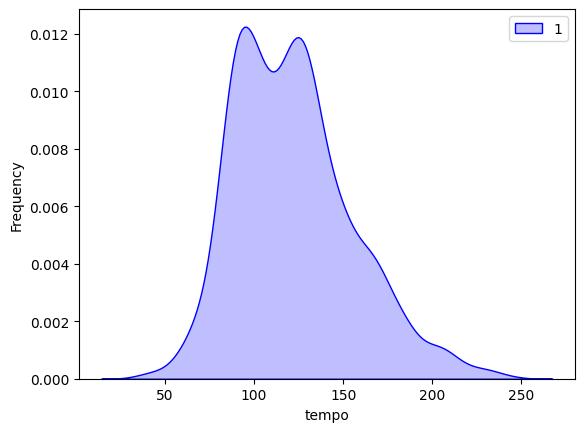

In [9]:
freq("tempo")


<ipython-input-8-44bb0745c2a3>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(train[col][(train["bbhot"] == 1)], color="Blue", shade = True)


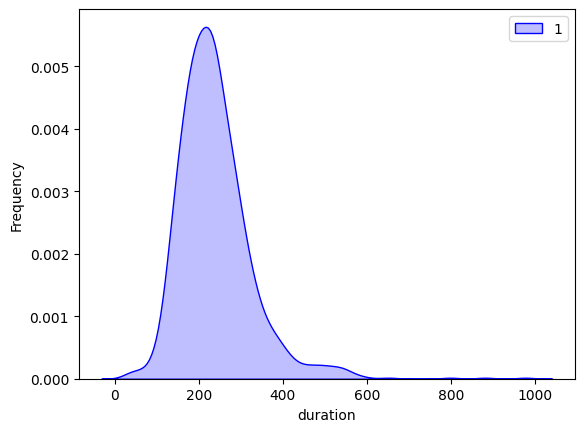

In [10]:
freq("duration")


<ipython-input-8-44bb0745c2a3>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(train[col][(train["bbhot"] == 1)], color="Blue", shade = True)


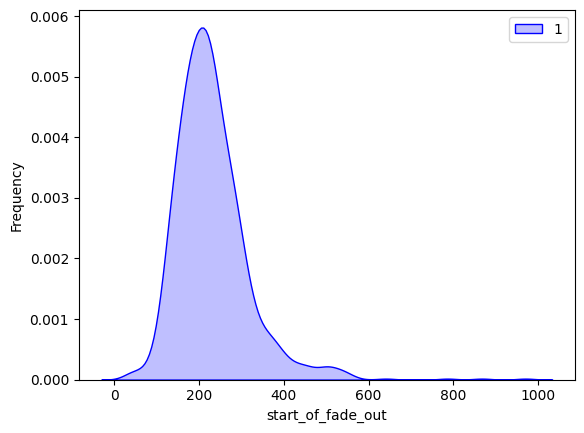

In [11]:
freq("start_of_fade_out")


<ipython-input-8-44bb0745c2a3>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(train[col][(train["bbhot"] == 1)], color="Blue", shade = True)


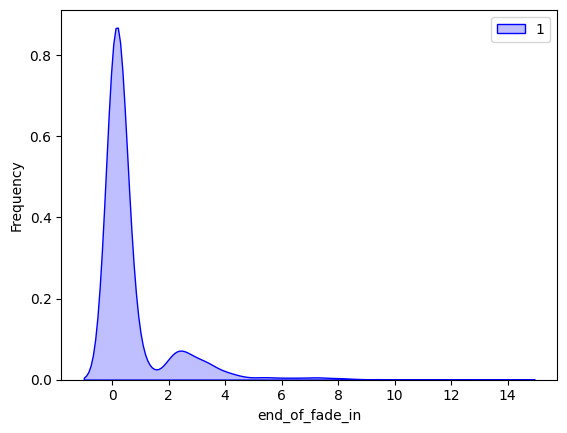

In [12]:
freq("end_of_fade_in")


<ipython-input-8-44bb0745c2a3>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(train[col][(train["bbhot"] == 1)], color="Blue", shade = True)


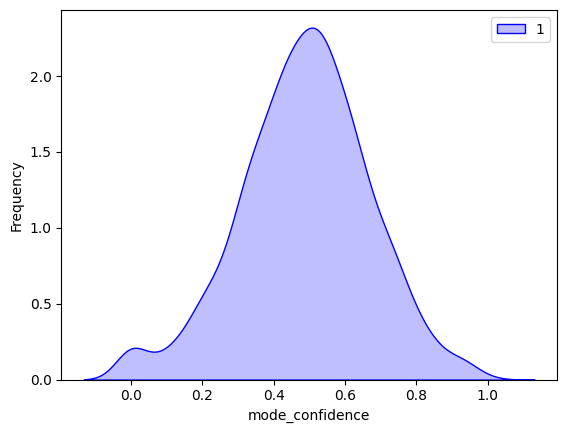

In [13]:
freq("mode_confidence")


<ipython-input-8-44bb0745c2a3>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(train[col][(train["bbhot"] == 1)], color="Blue", shade = True)


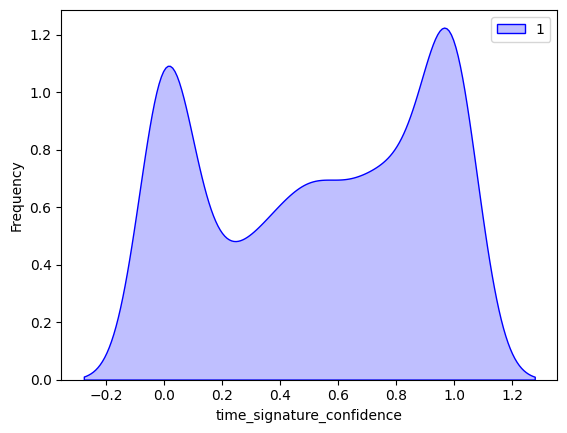

In [14]:
freq("time_signature_confidence")


<ipython-input-8-44bb0745c2a3>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(train[col][(train["bbhot"] == 1)], color="Blue", shade = True)


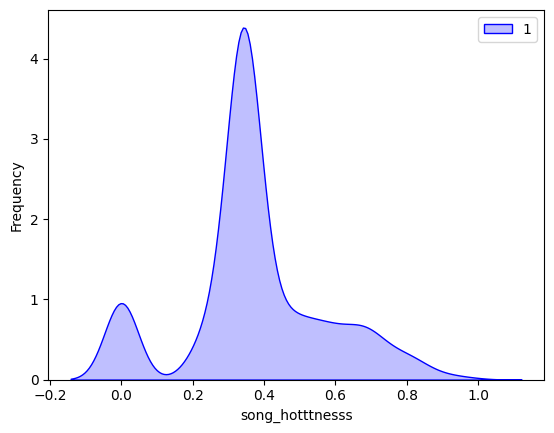

In [15]:
freq("song_hotttnesss")


In [16]:
train1 = train.drop(['artist_id', 'bbhot'], axis = 1)


In [17]:
train2 = train1.drop(['end_of_fade_in', 'key', 'key_confidence', 'mode', 'mode_confidence', 'year'], axis = 1)


In [18]:
train2.head()


,artist_familiarity,artist_hotttnesss,duration,loudness,song_hotttnesss,start_of_fade_out,tempo,time_signature,time_signature_confidence
0,0.780462,0.574275,280.21506,-3.306,0.597641,275.528,173.205,5,0.120
1,0.581794,0.401998,218.93179,-11.197,0.602120,218.932,92.198,4,0.778
2,0.630630,0.417500,148.03546,-9.843,0.342867,137.915,121.274,4,0.384
3,0.487357,0.343428,177.47546,-9.689,0.342867,172.304,100.070,1,0.000
4,0.630382,0.454231,233.40363,-9.013,0.342867,217.124,119.293,4,0.000


In [19]:
train2.columns


Index(['artist_familiarity', 'artist_hotttnesss', 'duration', 'loudness',
       'song_hotttnesss', 'start_of_fade_out', 'tempo', 'time_signature',
       'time_signature_confidence'],
      dtype='object')

In [20]:
Y = train['bbhot'].copy(deep=True)
Y.shape

(10001,)

In [21]:
X = train2.copy(deep=True)
X.shape

(10001, 9)

In [22]:
X

,artist_familiarity,artist_hotttnesss,duration,loudness,song_hotttnesss,start_of_fade_out,tempo,time_signature,time_signature_confidence
0,0.780462,0.574275,280.21506,-3.306,0.597641,275.528,173.205,5,0.120
1,0.581794,0.401998,218.93179,-11.197,0.602120,218.932,92.198,4,0.778
2,0.630630,0.417500,148.03546,-9.843,0.342867,137.915,121.274,4,0.384
3,0.487357,0.343428,177.47546,-9.689,0.342867,172.304,100.070,1,0.000
4,0.630382,0.454231,233.40363,-9.013,0.342867,217.124,119.293,4,0.000
...,...,...,...,...,...,...,...,...,...
9996,0.722571,0.499826,386.19383,-8.087,0.594080,386.194,140.185,4,0.099
9997,0.511663,0.409779,168.01914,-14.517,0.334707,163.463,77.072,3,0.597
9998,0.433508,0.289903,193.72363,-12.087,0.342867,186.015,118.123,4,0.205
9999,0.334457,0.216829,300.82567,-12.574,0.000000,300.826,137.663,4,0.000


In [25]:
Y

,bbhot
0,0
1,0
2,1
3,0
4,0
...,...
9996,0
9997,1
9998,0
9999,0


In [26]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X.select_dtypes(exclude = "object"))

VarianceThreshold(threshold=0)

In [27]:

constant_columns = [column for column in X.select_dtypes(exclude = "object").columns
                    if column not in X.select_dtypes(exclude = "object").columns[var_thres.get_support()]]

print(len(constant_columns))

0


In [28]:

# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [29]:
corr_features = correlation(X, 0.8)
len(set(corr_features))

2

In [30]:
X.drop(corr_features, axis =1, inplace = True
       )

In [31]:
X

,artist_familiarity,duration,loudness,song_hotttnesss,tempo,time_signature,time_signature_confidence
0,0.780462,280.21506,-3.306,0.597641,173.205,5,0.120
1,0.581794,218.93179,-11.197,0.602120,92.198,4,0.778
2,0.630630,148.03546,-9.843,0.342867,121.274,4,0.384
3,0.487357,177.47546,-9.689,0.342867,100.070,1,0.000
4,0.630382,233.40363,-9.013,0.342867,119.293,4,0.000
...,...,...,...,...,...,...,...
9996,0.722571,386.19383,-8.087,0.594080,140.185,4,0.099
9997,0.511663,168.01914,-14.517,0.334707,77.072,3,0.597
9998,0.433508,193.72363,-12.087,0.342867,118.123,4,0.205
9999,0.334457,300.82567,-12.574,0.000000,137.663,4,0.000


In [50]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state = 20)


In [51]:
x_train.shape, x_test.shape


((14094, 7), (3524, 7))

In [52]:
num_features = x_train.select_dtypes(exclude = "object")
cat_features = x_train.select_dtypes(include = "object")


In [53]:
num_features

,artist_familiarity,duration,loudness,song_hotttnesss,tempo,time_signature,time_signature_confidence
7514,0.383074,177.005260,-9.999000,0.224832,111.924000,1,0.727000
12901,0.586847,218.483896,-7.410959,0.525287,128.645522,4,0.552931
7836,0.514170,200.515460,-12.968000,0.215080,147.847000,4,0.000000
9364,0.616454,497.135870,-5.839000,0.342867,172.371000,4,0.860000
9492,0.679617,113.266490,-10.445000,0.342867,156.957000,4,0.648000
...,...,...,...,...,...,...,...
1607,0.686812,1598.197100,-7.638000,0.392009,74.384000,7,0.825000
3915,0.632560,307.878730,-7.865000,0.460485,87.965000,3,1.000000
14729,0.722227,260.044985,-7.932044,0.721803,135.533077,4,0.561309
4367,0.671596,202.709750,-8.472000,0.342867,152.082000,3,0.697000


In [54]:
cat_features

""
7514
12901
7836
9364
9492
...
1607
3915
14729
4367


In [55]:



step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(drop='first', handle_unknown='ignore'),cat_features.columns),
        ('num_tnf', StandardScaler(),num_features.columns )
    ],
    remainder='passthrough'
)

In [56]:
step1

ColumnTransformer(remainder='passthrough',
                  transformers=[('col_tnf',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 Index([], dtype='object')),
                                ('num_tnf', StandardScaler(),
                                 Index(['artist_familiarity', 'duration', 'loudness', 'song_hotttnesss',
       'tempo', 'time_signature', 'time_signature_confidence'],
      dtype='object'))])

 20%|██        | 3/15 [00:08<00:37,  3.13s/it]/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
 87%|████████▋ | 13/15 [00:30<00:02,  1.12s/it]/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
100%|██████████| 15/15 [00:32<00:00,  2.18s/it]


+---------------------------------+------------+-------------+----------+------------+--------------------+
| Model                           |   Accuracy |   Precision |   Recall |   F1 Score | Confusion Matrix   |
+=================================+============+=============+==========+============+====================+
| Logistic Regression             |   0.603008 |    0.603023 | 0.602987 |   0.602964 | [[1044  714]       |
|                                 |            |             |          |            |  [ 685 1081]]      |
+---------------------------------+------------+-------------+----------+------------+--------------------+
| Random Forest Classifier        |   0.842509 |    0.842703 | 0.842481 |   0.842478 | [[1460  298]       |
|                                 |            |             |          |            |  [ 257 1509]]      |
+---------------------------------+------------+-------------+----------+------------+--------------------+
| Gradient Boosting Classifi

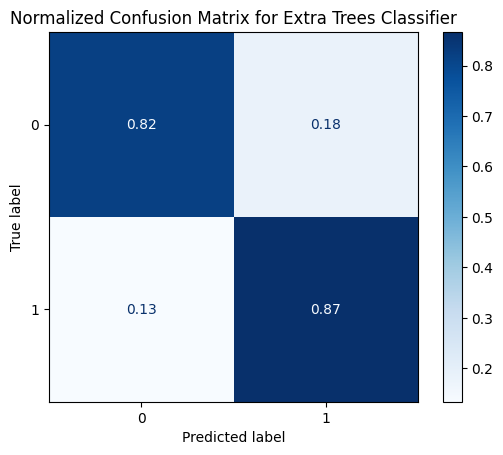

In [57]:


def evaluate_model(model, x_train, y_train, x_test, y_test):
    # Dummy step for pipeline compatibility, adjust as needed
    from sklearn.preprocessing import StandardScaler
    step1 = StandardScaler()

    pipe = Pipeline([
        ('transform', step1),
        ('model', model),
    ])
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)

    # Compute classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, cm

# Initialize classification models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Extra Trees Classifier': ExtraTreesClassifier(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'HistGradientBoosting Classifier': HistGradientBoostingClassifier(),
    'SGD Classifier': SGDClassifier(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier(),
    'Ridge Classifier': RidgeClassifier(),
    'MLP Neural Network': MLPClassifier(hidden_layer_sizes=(10,), max_iter=100),
}

# Store results
results = []

for model_name, model in tqdm(models.items()):
    accuracy, precision, recall, f1, cm = evaluate_model(model, x_train, y_train, x_test, y_test)
    results.append([model_name, accuracy, precision, recall, f1, cm])

# Print the results in a table
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Confusion Matrix"]
print(tabulate(results, headers, tablefmt="grid"))

# Identify the best model
max_accuracy_index = np.argmax([result[1] for result in results])
best_model_name = results[max_accuracy_index][0]
best_cm = results[max_accuracy_index][5]

print(f"\nThe model with the highest accuracy is: {best_model_name} (Accuracy: {results[max_accuracy_index][1]:.4f})")

# Plot normalized confusion matrix
normalized_cm = best_cm.astype('float') / best_cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=normalized_cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Normalized Confusion Matrix for {best_model_name}")
plt.show()


In [58]:
Y.value_counts()

,count
bbhot,
0,8809
1,1192


In [45]:
!pip install imbalanced-learn


In [48]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Assuming `X` is your feature matrix and `y` is your target vector
print("Original dataset class distribution:", Counter(Y))

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X, Y)

print("Resampled dataset class distribution:", Counter(y_resampled))


Original dataset class distribution: Counter({0: 8809, 1: 1192})
Resampled dataset class distribution: Counter({0: 8809, 1: 8809})


In [49]:
X_resampled.shape, y_resampled.shape

((17618, 7), (17618,))

In [70]:
# Corrected model definition
model = ExtraTreesClassifier(
    n_estimators=100,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features=None,
    max_depth=30,
    criterion='entropy',
    bootstrap=False
)
model.fit(x_train, y_train)  # Training the model

# Calculate metrics on the training set
train_accuracy = accuracy_score(y_train, model.predict(x_train))
train_precision = precision_score(y_train, model.predict(x_train), average='macro')
train_recall = recall_score(y_train, model.predict(x_train), average='macro')
train_f1 = f1_score(y_train, model.predict(x_train), average='macro')

# Calculate metrics on the test set
test_accuracy = accuracy_score(y_test, model.predict(x_test))
test_precision = precision_score(y_test, model.predict(x_test), average='macro')
test_recall = recall_score(y_test, model.predict(x_test), average='macro')
test_f1 = f1_score(y_test, model.predict(x_test), average='macro')

# Create a DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Train Set': [train_accuracy, train_precision, train_recall, train_f1],
    'Test Set': [test_accuracy, test_precision, test_recall, test_f1]
})

metrics_df

,Metric,Train Set,Test Set
0,Accuracy,0.998226,0.831442
1,Precision,0.998232,0.831838
2,Recall,0.998225,0.831402
3,F1 Score,0.998226,0.831379


# Hyperparameter Tuning

In [68]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import numpy as np

# Define the model
model = ExtraTreesClassifier(random_state=42)

# Define the parameter grid
param_dist = {
    "n_estimators": [50, 100, 200, 500, 1000],  # Number of trees
    "max_features": ["sqrt", "log2", None],     # Feature selection for split
    "max_depth": [None, 10, 20, 30, 50, 100],  # Maximum depth
    "min_samples_split": [2, 5, 10, 20],       # Minimum samples for a split
    "min_samples_leaf": [1, 2, 4, 10],         # Minimum samples in a leaf node
    "criterion": ["gini", "entropy"],          # Splitting criterion
    "bootstrap": [True, False],                # Use bootstrap samples
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,  # Number of combinations to try
    scoring="accuracy",  # Scoring metric
    cv=5,  # Cross-validation folds
    verbose=2,
    random_state=42,
    n_jobs=-1,  # Use all available cores
)

# Perform the search
random_search.fit(x_train, y_train)

# Best parameters and model
best_model = random_search.best_estimator_
print("Best parameters found:\n", random_search.best_params_)

# Evaluate on test data
y_pred = best_model.predict(x_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:
 {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 30, 'criterion': 'entropy', 'bootstrap': False}

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      1758
           1       0.82      0.84      0.83      1766

    accuracy                           0.83      3524
   macro avg       0.83      0.83      0.83      3524
weighted avg       0.83      0.83      0.83      3524



In [65]:
random_search.best_estimator_

ExtraTreesClassifier(criterion='entropy', max_depth=30, max_features=None,
                     min_samples_leaf=2, min_samples_split=5, random_state=42)